In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


<H1>EDA and Regression</h1>

Here we will walk through doing a regression for a common example dataset, complete with walking through some common exploratory steps. This is representative of what we'd do in a real situation, just a simple version. As we go through this we want to:

<ul>
<li>Load and clean the data - make sure we've gotten rid of junk, fixed errors and blanks, corrected data type issues, etc...
<li>Explore the data - what does our data look like? Do we have consistent data? What are the distributions and correlations? Is there anything that may make us adjust or correct before proceeding?
<li>Shape the data for prediction - prep whatever data we are going to use in a regression ready format.
<li>Perform regression.
<li>Examine results
</ul>

For the cleaning and exploring steps especially, we aren't really following a specific set of actions. We want to look at the data, and see if there's anything to change - some data may need cleaning, some won't; some data may have features we want to remove or change, some won't. We basically just want to look for anything that might lead us to adjust our approach away from just using all the data unchanged - this example isn't super dirty/complex, so we won't be doing an overwhelming amount of action here. This process is something we get better at with time, practice, and more ML tools. 

<H1>EDA 和回歸</h1>

在這裡，我們將逐步完成對常見示例數據集的回歸，並完成一些常見的探索性步驟。這代表了我們在真實情況下所做的事情，只是一個簡單的版本。當我們經歷這個時，我們想要：

<ul>
<li>加載並清理數據 - 確保我們已清除垃圾、修復錯誤和空白、更正數據類型問題等...
<li>探索數據 - 我們的數據是什麼樣的？我們有一致的數據嗎？分佈和相關性是什麼？有什麼可以讓我們在繼續之前進行調整或糾正的嗎？
<li>調整數據以進行預測 - 以回歸就緒格式準備我們要使用的任何數據。
<li>執行回歸。
<li>檢查結果
</ul>

特別是對於清潔和探索步驟，我們並沒有真正遵循一組特定的操作。我們想查看數據，看看是否有任何需要更改的地方——有些數據可能需要清理，有些則不需要；有些數據可能具有我們想要刪除或更改的功能，有些則不會。我們基本上只是想尋找任何可能導致我們調整我們的方法，而不是僅僅使用所有不變的數據——這個例子不是超級臟/複雜，所以我們不會在這裡做大量的動作。隨著時間、實踐和更多 ML 工具的使用，我們會越來越擅長這個過程。

In [2]:
# Importing the Dataset
df = pd.read_csv("data/auto-mpg.data",delim_whitespace=True, names=["MPG","Cylinders","Displacement","HP","Weight","Acceleration","Year","Origin","Name"])
df.head()

,MPG,Cylinders,Displacement,HP,Weight,Acceleration,Year,Origin,Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
#Get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   HP            398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Year          398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


I'll set the two categorical values as categorical. This isn't required, but it will tell some things (e.g. pairplot, describe) to treat it as a categorical variable. 

Having correctly identified datatypes may or may not make a difference in terms of whether or not things will work, but it is good practice and will make some functions work more as we'd expect. 

In [4]:
# Converting the variables to the correct types

#We'll need this once we notice the error below
df = df[df["HP"]!="?"]

df['Cylinders']=df['Cylinders'].astype('category')
df['Origin']=df['Origin'].astype('category')
df['HP']=df['HP'].astype('float64')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           392 non-null    float64 
 1   Cylinders     392 non-null    category
 2   Displacement  392 non-null    float64 
 3   HP            392 non-null    float64 
 4   Weight        392 non-null    float64 
 5   Acceleration  392 non-null    float64 
 6   Year          392 non-null    int64   
 7   Origin        392 non-null    category
 8   Name          392 non-null    object  
dtypes: category(2), float64(5), int64(1), object(1)
memory usage: 25.6+ KB


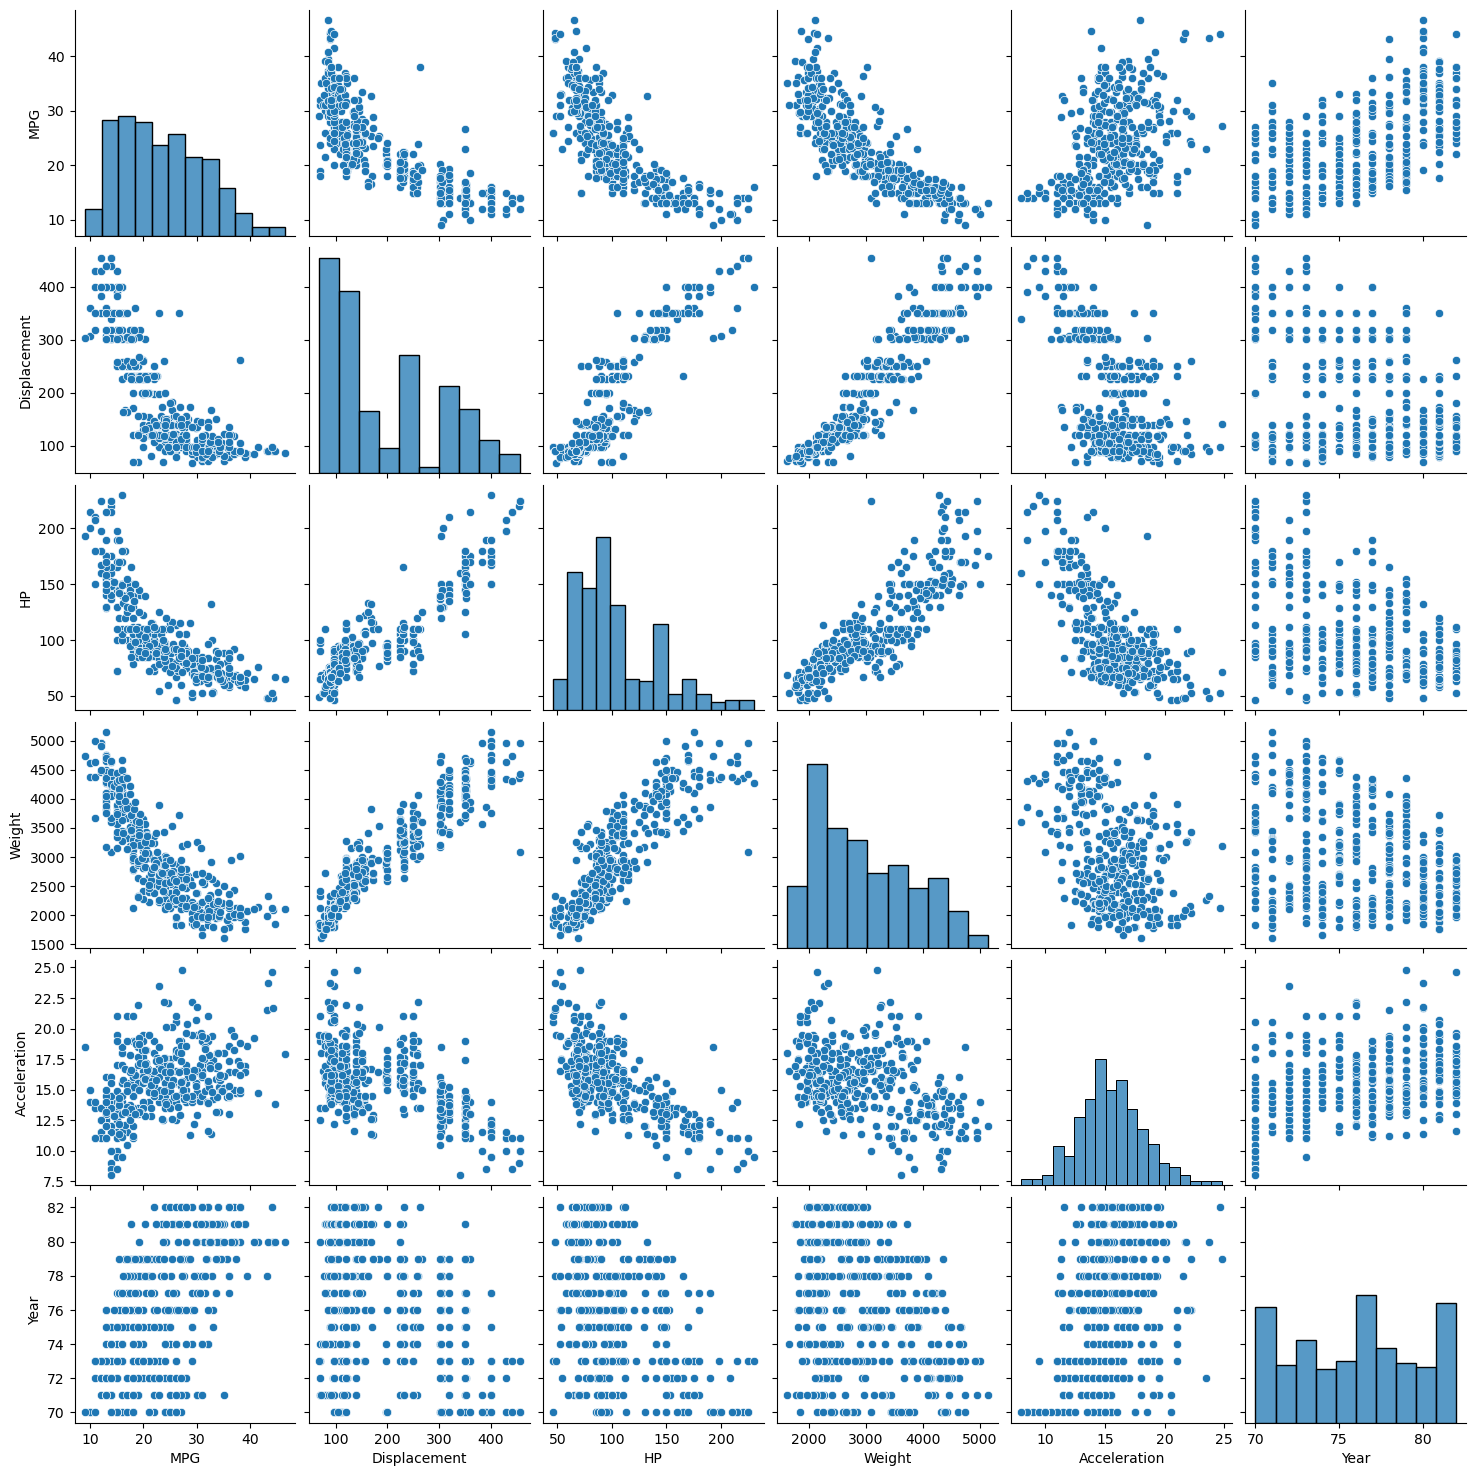

In [5]:
#visualize pairplot
sns.pairplot(df)

There are only a few things that we might need to be attentive of in the pairplot. For the most part the data looks unremarkable:
<ul>
<li>Some colinearity between weight, displacement, and HP. We can address that later on. 
<li>MPG (the target) looks to have a non-linear relationship with those varaibles. We'll consider things like that next time. 
</ul> 

We can look at boxplots and counts for the categorical varaibles. the countplot is basically just a simple hist for categorical data. 

We didn't know exactly what Origin was, but now I am going to suspect that it is American/Japanesse/European - we could likely verify this by looking at the data and using our domain knowledge of where different cars are from. 

The grid used below is the matplotlib way to do subplots, it is a sightly more elaborate version of the thinkplot one. We basically make a grid, then assign each graph to a square in the grid. The details of exactly how we visualize data don't really matter, as long as we graph it, but playing with some different ways gives us more tools to make things look OK. Googling "seaborn ___________" will almost always give some examples online - the seaborn stuff is much easier to use than the matplotlib directly, so I'd advise sticking to that. 

In [6]:
#Print boxplots - we'll put them in subplots to make it look fancy
#Countplots are basically categorical hists - we could've used a hist as well
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
fig.suptitle("Categorical Plotting", fontsize=35)
sns.boxplot(x="Cylinders", y="MPG", data=df,ax=ax[0,0])
sns.boxplot(x="Origin", y="MPG", data=df,ax=ax[0,1])
sns.countplot(x="Cylinders", data=df,ax=ax[1,0])
sns.countplot(x="Origin", data=df,ax=ax[1,1])

<AxesSubplot:xlabel='Origin', ylabel='count'>

In [7]:
df[df["Cylinders"]==3].Name.count(), df[df["Cylinders"]==5].Name.count()

(4, 3)

Looks like 3 and 5 cylinders are rare (if you konw about cars, this makes sense). I'm going to consider dropping those - we'll see. The reasoning is that we want to predict the MPG in general, there simply aren't very many samples for those two subgroups, so it may end up being more confounding than helpful. E.g. the impact of having 5 cylinders will be due to the 3 specific cars we have in the data, not the general impact of having that many cylinders. 

A similar example, say you were prediciting height of people and one factor was hair color. If you had 3 redheads in the data, any influence "being a redhead" has on the expected height would be overwhelmed by the influence that those specific 3 have. So that feature isn't giving you the "impact of having red hair" it is giving you the impact of "being Jim" - or the specific person in the sample. 

As well, if the data is being split, the results will probably be skewed - e.g. you may only get one 3 cylinder car in training the model - then the impact of 3 cylinders doesn't exist, you only get that one car. If you happen to get the one 3cyl car with terrible MPG, that will impact the results. If you got the most efficient 3cyl car ever in the next trial, things could then be totally different - the model would be unstable - bad. 

In [8]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

C:\Users\Elsa\AppData\Local\Temp\ipykernel_18800\527883699.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,MPG,Displacement,HP,Weight,Acceleration,Year
MPG,1.00,-0.81,-0.78,-0.83,0.42,0.58
Displacement,-0.81,1.00,0.90,0.93,-0.54,-0.37
HP,-0.78,0.90,1.00,0.86,-0.69,-0.42
Weight,-0.83,0.93,0.86,1.00,-0.42,-0.31
Acceleration,0.42,-0.54,-0.69,-0.42,1.00,0.29
Year,0.58,-0.37,-0.42,-0.31,0.29,1.00


相關矩陣在線性回歸中非常有用。 我們知道，如果變量之間存在相關性，那麼我們就無法準確地歸因於相關變量之間的影響。

在這裡，重量和排量（發動機的尺寸）高度相關。 我們稍後可能會刪除一個...
<br><br><br>

The correlation matrix is very useful in Linear Regression. We know that if there is correlation between the varibles then we can't accurately attribute the impact between the correlated variables. 

Here, weight and displacement (the size of the engine) are highly correlated. We may remove one later on... 
<br><br><br>

<h2>Prep data for regression</h2>

At this point we are pretty much ready to get our regression on. We just need to get the data in the right format. This will vary a little depending on what we want to use. We can also make some data cleaning choices relating to the issues we noticed above. 

In [9]:
#Clean out questionable bits - cylinders and correlated values. 
#We can try once with this and once without. 
#In this data, the difference probably won't be huge. 
print(len(df))
df_ = df.drop(columns={"Displacement","Name"})
df_ = df_[df_["Cylinders"]!=3]
df_ = df_[df_["Cylinders"]!=5]

#We need to remove the categories that are not used anymore.
#They don't automatically vanish. 
#The function from pandas need a series, so we have to do a roundabout way
df_['Cylinders'] = pd.Series(df_['Cylinders']).cat.remove_unused_categories()
print(len(df_))

392
385


In [10]:
#Check the cylinders 
df_["Cylinders"].value_counts()

4    199
8    103
6     83
Name: Cylinders, dtype: int64

We have two categorical variables - cylinders and origin. Currently it will work with the numbers, but I don't think it is best. Right now they'll be treated as numbers in the regression, and that doesn't make a tonne of sense. 

To deal with them better, we can use one hot encoding to translate each category to its own column. We will do it the easy way with the get_dummies function. I'm going to do it twice, we'll explain why after. 

我們有兩個分類變量——圓柱體和原點。 目前它將與數字一起使用，但我認為這不是最好的。 現在它們將被視為回歸中的數字，這沒有多大意義。

為了更好地處理它們，我們可以使用一種熱編碼將每個類別轉換為它自己的列。 我們將使用 get_dummies 函數以簡單的方式完成它。 我打算做兩次，我們會在之後解釋原因。

In [11]:
#Get some new info
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           385 non-null    float64 
 1   Cylinders     385 non-null    category
 2   HP            385 non-null    float64 
 3   Weight        385 non-null    float64 
 4   Acceleration  385 non-null    float64 
 5   Year          385 non-null    int64   
 6   Origin        385 non-null    category
dtypes: category(2), float64(4), int64(1)
memory usage: 19.1 KB


In [12]:
# Do the dummies
df_tmp = pd.get_dummies(df_)
df_tmp.head(5)


,MPG,HP,Weight,Acceleration,Year,Cylinders_4,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,18.0,130.0,3504.0,12.0,70,0,0,1,1,0,0
1,15.0,165.0,3693.0,11.5,70,0,0,1,1,0,0
2,18.0,150.0,3436.0,11.0,70,0,0,1,1,0,0
3,16.0,150.0,3433.0,12.0,70,0,0,1,1,0,0
4,17.0,140.0,3449.0,10.5,70,0,0,1,1,0,0


Pretty simple, instead of each categorical column having several possible values, now each of those values is a column, and each row is true (or 1) in one of the columns and a false (or 0) for the others. 
<br><br>
The one issue here is that what is represented if all the columns are 0? By giving each value its own column, we've invented possible data - all 0s. 

The solution to this is to just drop a column for each category - that one that is dropped is represented by all 0s now. 

By doing this we avoid inventing some data. 

This is common, though not universal. For linear regression we want to get rid of that. 

In [13]:
#Redo the dummy variables. 
df2 = pd.get_dummies(df_, drop_first=True)
df2.head(5)


,MPG,HP,Weight,Acceleration,Year,Cylinders_6,Cylinders_8,Origin_2,Origin_3
0,18.0,130.0,3504.0,12.0,70,0,1,0,0
1,15.0,165.0,3693.0,11.5,70,0,1,0,0
2,18.0,150.0,3436.0,11.0,70,0,1,0,0
3,16.0,150.0,3433.0,12.0,70,0,1,0,0
4,17.0,140.0,3449.0,10.5,70,0,1,0,0


The pandas function of creating the dummy variables is the most simplest one. The encoding notebook has an example of the sklearn process, but this way is much more simple. 

Next we want to split our features (Xs) and our target (Y). 

創建虛擬變量的 pandas 函數是最簡單的函數。 encoding notebook有一個sklearn過程的例子，但是這種方式簡單多了。

接下來我們要拆分特徵 (Xs) 和目標 (Y)。

In [14]:
#X values in a DF
dfX = df2.drop(columns={"MPG"})
dfY = df2["MPG"]

#If we want an array for sklearn
y = np.array(dfY).reshape(-1,1)
x = np.array(dfX)
x.shape, y.shape


((385, 8), (385, 1))

Data is ready to go - we can now either sklearn with the arrays or statsmodel with the dataframes or the arrays. 

We can split the data again into a training set and a test set, so we can calculate our accuracy on some new data. 

**Note: repeating the split/train/test/calculate cycle is often a good idea. We don't need to build a big loop (though we could) - we'll add this later on with a function built into sklearn that makes it easier - kfold.** 

數據已準備就緒——我們現在可以使用數組進行 sklearn，或者使用數據幀或數組進行 statsmodel。

我們可以將數據再次拆分為訓練集和測試集，這樣我們就可以計算一些新數據的準確性。

**注意：重複拆分/訓練/測試/計算循環通常是個好主意。 我們不需要構建一個大循環（儘管我們可以）——稍後我們將使用內置到 sklearn 中的函數添加它，這使得它更容易——kfold。**

In [15]:
# Dividing the Dataset into Test and Train
# This does the splitting of both the xs and ys, and spits back all 4 sets. 
# This function is really common, and does the same thing as the sample splitting we did by hand
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)


X-Train: (269, 8)
X-Test: (116, 8)
Y-Train: (269, 1)
Y-Test: (116, 1)


In [16]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xTrain,yTrain)


LinearRegression()

In [17]:
## Seeing the result of Linear Regression
#I'll use the dataframes to make sure that we get the column names. 

# This one is using the post-split test data. Hence the lack of labels. 
import statsmodels.api as sm
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          2.96e-101
Time:                        12:40:02   Log-Likelihood:                -687.87
No. Observations:                 269   AIC:                             1394.
Df Residuals:                     260   BIC:                             1426.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.7976      5.486     -1.968      0.0

In [18]:
# Predictiions for TEST
# Calculate RMSE
ypred = model.predict(xTest)
mean_squared_error(ypred,yTest,squared=False)


2.968261503376791

In [19]:
#Get Residuals and picture them in a DF for easy reading. 
tmp1 = pd.DataFrame(yTest, columns={"Y values"})
tmp2 = pd.DataFrame(ypred, columns={"Predictions"})
tmp3 = pd.DataFrame((yTest-ypred), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.sort_values("Residual").head()

,Y values,Predictions,Residual
111,23.9,30.546336,-6.646336
84,19.0,25.527200,-6.527200
11,31.0,36.143519,-5.143519
68,20.0,25.137330,-5.137330
98,19.0,23.804907,-4.804907


After we're done with all of this testing, what if we want to use the model to make predictions? We all just got jobs monitoring MPG of new cars, and we are way to lazy to measure all of them, so we want to make accurate predictions and go back to sleep. 

For the model we want to use, we'll train it with all the data. The splitting and testing gave us good estimates for accuracy, but using all the data to create the model will deliver the best results in general. What it won't do is give us those test scores to evaluate it, but if we've already decided to use it we should train a new model with all the data. In practice we'd probably compare the test scores that we got here with the scores we got using different algorithms, then we'd train the most accurate one with all data and use that. 

對於我們要使用的模型，我們將使用所有數據對其進行訓練。 

拆分和測試為我們提供了很好的準確性估計，但使用所有數據創建模型通常會產生最佳結果。 

它不會做的是給我們那些測試分數來評估它，但如果我們已經決定使用它，我們應該用所有數據訓練一個新模型。 

在實踐中，我們可能會將我們在這裡獲得的測試分數與我們使用不同算法獲得的分數進行比較，然後我們將使用所有數據訓練最準確的分數並使用它。

<h2>Exercise - predict BMI</h2>

Follow a similar process to predict BMI using the data below. 

In [20]:
#Load data
df_d = pd.read_csv("data/diabetes.csv")
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
sns.pairplot(df_d)

In [22]:
#Outlier filter
df_d = df_d[df_d["BMI"] > 10]
df_d = df_d[df_d["Glucose"] > 10]
df_d = df_d[df_d["SkinThickness"] < 80]
df_d = df_d[df_d["SkinThickness"] > 0]
df_d = df_d[df_d["BloodPressure"] > 10]


In [23]:
#Make outcome a category
df_d['Outcome']=df_d['Outcome'].astype('category')
df_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               531 non-null    int64   
 1   Glucose                   531 non-null    int64   
 2   BloodPressure             531 non-null    int64   
 3   SkinThickness             531 non-null    int64   
 4   Insulin                   531 non-null    int64   
 5   BMI                       531 non-null    float64 
 6   DiabetesPedigreeFunction  531 non-null    float64 
 7   Age                       531 non-null    int64   
 8   Outcome                   531 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 38.0 KB


In [24]:
df_d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000,531.000000
mean,3.519774,120.887006,71.508475,29.050847,115.205273,32.886817,0.502831,31.557439
std,3.314503,30.852150,12.321688,10.086945,123.022000,6.887148,0.344857,10.690412
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000
25%,1.000000,98.500000,64.000000,22.000000,0.000000,27.850000,0.258500,23.000000
50%,2.000000,115.000000,72.000000,29.000000,92.000000,32.800000,0.415000,28.000000
75%,5.000000,141.000000,80.000000,36.000000,165.500000,36.900000,0.659000,38.000000
max,17.000000,199.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [25]:
#Categorical plot
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
fig.suptitle("Categorical Plotting", fontsize=35)
sns.boxplot(x="Outcome", y="BMI", data=df_d,ax=ax[0])
sns.countplot(x="Outcome", data=df_d,ax=ax[1])

<AxesSubplot:xlabel='Outcome', ylabel='count'>

In [26]:
#Plot numerical
sns.pairplot(df_d)

In [27]:
#Regression data setup

dfXd = df_d.drop(columns={"BMI"})
dfYd = df_d["BMI"]

xD = np.array(dfXd)
yD = np.array(dfYd).reshape(-1,1)
xD.shape, yD.shape

((531, 8), (531, 1))

In [28]:
#Split data
xTrainD,xTestD,yTrainD,yTestD = train_test_split(xD,yD,test_size=.3)

In [29]:
#Train model and get R2 from training
dm = LinearRegression().fit(xTrainD,yTrainD)
print("Training R2:", dm.score(xTrainD,yTrainD))

Training R2: 0.46665760819531665


In [30]:
#RMSE with test data
dpreds = dm.predict(xTestD)
print("RMSE test:", mean_squared_error(dpreds,yTestD,squared=False))
print("R2 test:", dm.score(xTestD,yTestD))

RMSE test: 5.165611965342754
R2 test: 0.5559790973506575
